In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
mask_df = pd.read_csv('term_landseamask.csv', sep=';')

In [15]:
mask_df

,id,i,j,lon,lat,index,olim
0,1,2,361,-179.75,89.75,-999,0
1,2,2,360,-179.75,89.25,-999,0
2,3,2,359,-179.75,88.75,-999,0
3,4,2,358,-179.75,88.25,-999,0
4,5,2,357,-179.75,87.75,-999,0
...,...,...,...,...,...,...,...
259195,259196,721,6,179.75,-87.75,-999,2
259196,259197,721,5,179.75,-88.25,-999,2
259197,259198,721,4,179.75,-88.75,-999,2
259198,259199,721,3,179.75,-89.25,-999,2


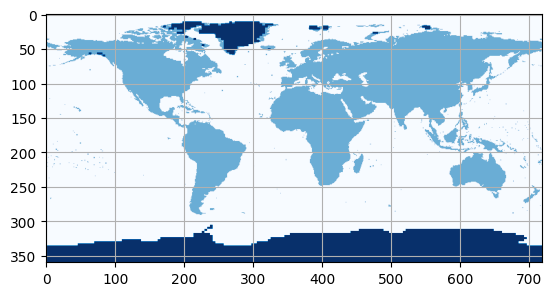

In [46]:
mask = np.array(mask_df['olim']).reshape(720, 360).T
plt.imshow(mask, cmap='Blues')
plt.grid()

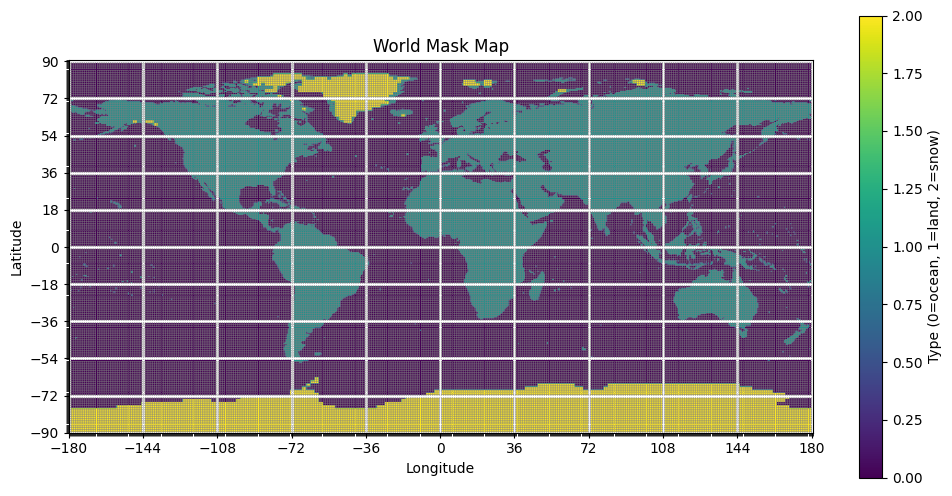

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a sample mask
# mask = np.random.choice([0, 1, 2], size=(360, 720), p=[0.5, 0.4, 0.1])

# Function to plot the mask
def plot_world_mask(mask):
    mask = mask[::-1]
    
    fig, ax = plt.subplots(figsize=(12, 6))

    # Display the mask
    c = ax.imshow(mask, extent=[-180, 180, -90, 90], origin='lower', cmap='viridis')
    
    # Add a color bar
    cbar = fig.colorbar(c, ax=ax, orientation='vertical')
    cbar.set_label('Type (0=ocean, 1=land, 2=snow)')
    
    # Set grid
    ax.set_xticks(np.arange(-180, 181, 36), minor=False)
    ax.set_yticks(np.arange(-90, 91, 18), minor=False)
    ax.grid(which='major', color='white', linestyle='-', linewidth=2)

    # Set finer grid
    ax.set_xticks(np.arange(-180, 181, 0.5), minor=True)
    ax.set_yticks(np.arange(-90, 91, 0.5), minor=True)
    ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('World Mask Map')

    plt.savefig('mask_map.jpg')

# Plot the mask
plot_world_mask(mask)


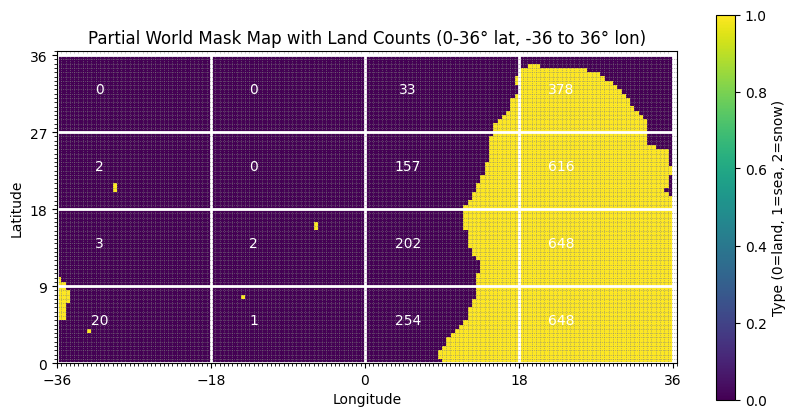

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function to plot the mask for a specified region with land cell counts in each 10-degree grid
def plot_partial_world_mask_with_counts(mask):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Calculate index slices for the desired longitude and latitude ranges
    lon_start, lon_end = 288, 432  # -36 to 36 degrees longitude
    lat_start, lat_end = 180, 252  # 0 to 36 degrees latitude

    # Slice the mask to the desired region
    region_mask = mask[lat_start:lat_end, lon_start:lon_end]

    # Display the mask region
    c = ax.imshow(region_mask, extent=[-36, 36, 0, 36], origin='lower', cmap='viridis')

    # Add a color bar
    cbar = fig.colorbar(c, ax=ax, orientation='vertical')
    cbar.set_label('Type (0=land, 1=sea, 2=snow)')

    # Define the size of each grid block in terms of indices (20 indices = 10 degrees)
    # grid_size = 

    # Ensure that the dimensions are divisible by grid_size
    height, width = region_mask.shape
    height -= height % 18
    width -= width % 36

    # Reshape the array to a (n_blocks_lat, grid_size, n_blocks_lon, grid_size) array
    reshaped_mask = region_mask[:height].reshape(height // 18, 18, 
                                                 width // 36, 36)

    # Count land cells in each block
    land_counts = np.sum(reshaped_mask == 1, axis=(1, 3))  # Sum over the inner 20x20 blocks

    # Annotate counts on the plot
    for i in range(land_counts.shape[0]):
        for j in range(land_counts.shape[1]):
            # Coordinates for annotations
            lon_center = -36 + j * 18 + 5
            lat_center = 0 + i * 9 + 5
            # Annotate the land cell count
            ax.text(lon_center, lat_center, str(land_counts[i, j]), color='white', ha='center', va='center')

    # Set major grid
    ax.set_xticks(np.arange(-36, 37, 18))
    ax.set_yticks(np.arange(0, 37, 9))
    ax.grid(which='major', color='white', linestyle='-', linewidth=2)

    # Set finer grid
    ax.set_xticks(np.arange(-36, 37, 0.5), minor=True)
    ax.set_yticks(np.arange(0, 37, 0.5), minor=True)
    ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Partial World Mask Map with Land Counts (0-36° lat, -36 to 36° lon)')

    plt.savefig('mask_map_part.jpg')

# Assuming the mask is predefined
plot_partial_world_mask_with_counts(mask)
